<a href="https://colab.research.google.com/github/Sadik-Sikder/Sadik-Sikder/blob/main/movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data
movies = pd.read_csv('/content/sample_data/movies.csv')
ratings = pd.read_csv('/content/sample_data/ratings.csv')

# Merge the datasets
data = pd.merge(ratings, movies, on='movieId')

print(data)

         userId  movieId  rating   timestamp  \
0             1      296     5.0  1147880044   
1             3      296     5.0  1439474476   
2             4      296     4.0  1573938898   
3             5      296     4.0   830786155   
4             7      296     4.0   835444730   
...         ...      ...     ...         ...   
1899928   12593    72645     5.0  1284219839   
1899929   12593    73780     4.5  1285360808   
1899930   12593    75947     5.0  1282171112   
1899931   12593    86664     4.5  1347044182   
1899932   12593    88485     2.0  1347044136   

                                                     title  \
0                                      Pulp Fiction (1994)   
1                                      Pulp Fiction (1994)   
2                                      Pulp Fiction (1994)   
3                                      Pulp Fiction (1994)   
4                                      Pulp Fiction (1994)   
...                                                

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


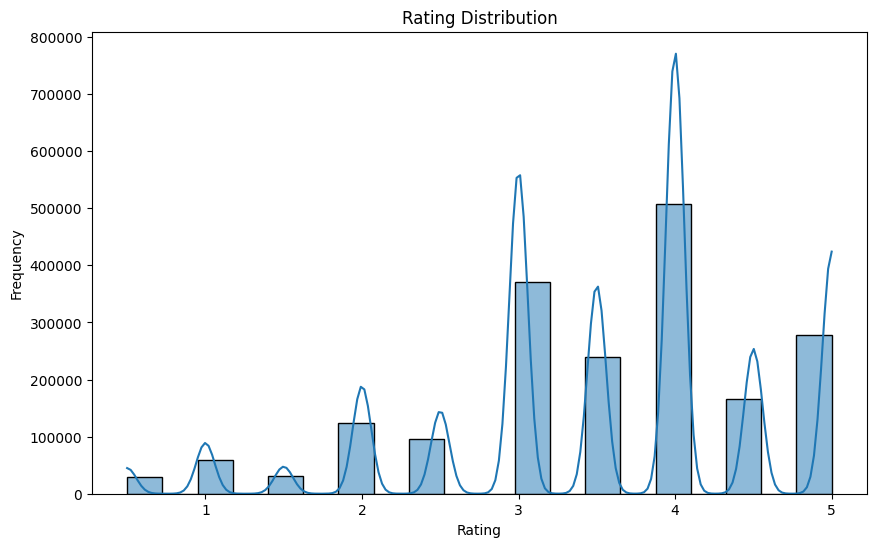

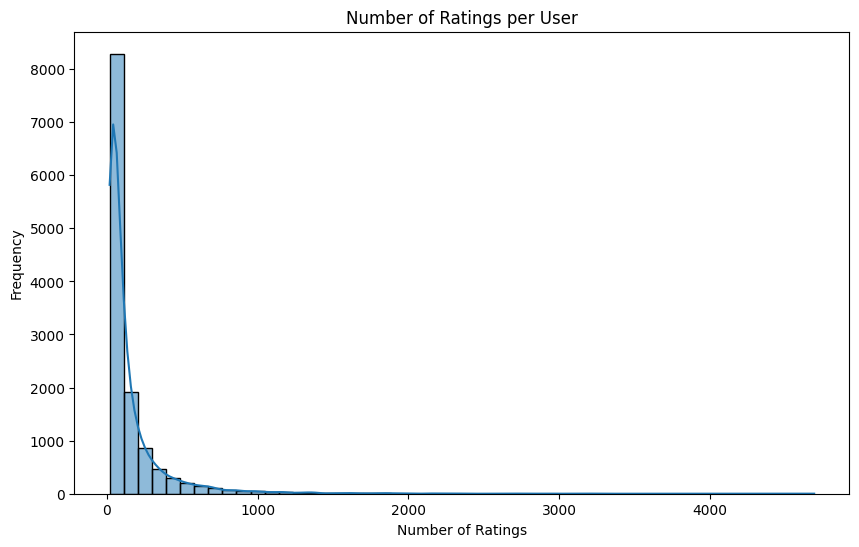

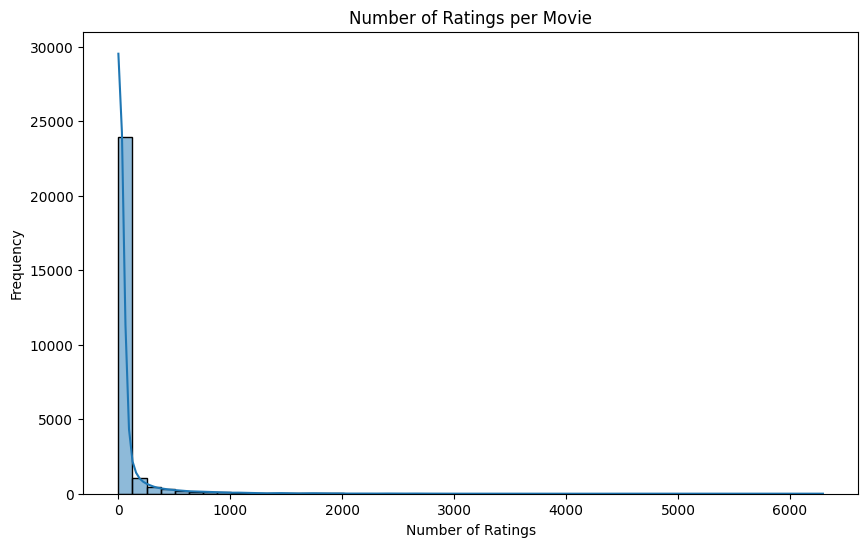

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

user_ratings_count = data.groupby('userId').size()
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

movie_ratings_count = data.groupby('movieId').size()
plt.figure(figsize=(10, 6))
sns.histplot(movie_ratings_count, bins=50, kde=True)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162994 sha256=0a834341d3907edeea187b5a899e666d652f098970ce4d506c3ee7a46fc4c773
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

algo = SVD()

algo.fit(trainset)

predictions = algo.test(testset)

rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


RMSE: 0.8217
RMSE: 0.8216772397563865


In [ ]:
def get_top_n_recommendations(algo, user_id, movies, n=10):
    movie_ids = movies['movieId'].unique()

    user_rated_movies = ratings[ratings['userId'] == user_id]['movieId']
    movie_ids_to_predict = [mid for mid in movie_ids if mid not in user_rated_movies.values]
    predictions = [algo.predict(user_id, mid) for mid in movie_ids_to_predict]

    predictions.sort(key=lambda x: x.est, reverse=True)

    top_n = predictions[:n]

    top_n_movie_ids = [pred.iid for pred in top_n]
    top_n_movie_titles = movies[movies['movieId'].isin(top_n_movie_ids)]['title'].unique()
    return top_n_movie_titles

user_id = 1
top_n_recommendations = get_top_n_recommendations(algo, user_id, movies, n=10)
print(top_n_recommendations)


['Shawshank Redemption, The (1994)'
 'Cinema Paradiso (Nuovo cinema Paradiso) (1989)'
 'Good Will Hunting (1997)'
 'Grave of the Fireflies (Hotaru no haka) (1988)'
 'Man with the Movie Camera, The (Chelovek s kino-apparatom) (1929)'
 'Lives of Others, The (Das leben der Anderen) (2006)'
 'Dear Zachary: A Letter to a Son About His Father (2008)'
 'The Jinx: The Life and Deaths of Robert Durst (2015)'
 'Planet Earth II (2016)' 'Blue Planet II (2017)']
